# Models

This page presents overview of the models, recovery method and results.

## Specification of models 
To make sure the difference between model fits are due to the *type* of learning each model allows, we fixed two features that change the general fit of all models: 
1. All considered models differentiate between learning from shocks and no-shocks - for example, the Rescorla-Wagner model has separate learning rates for learning from shocks and no-shocks. 
2. All models estimate the starting value (shock probability estimate in our case).

In model short codes, the number always refers to the number of free parameters.
### Rescorla-Wagner (RW-3)
### Hybrid Pearce-Hall 
#### "standard" version (PH-5)
#### "nokappa" version (PHnk-4)
### Beta State Inference Model (B-SIM-5)





---


## Model recovery 

Model recovery was performed on data generated using plausible parameter values. 
By "plausibility" we mean values that:
1. allow the value function to stay within 0 and 1
2. resemble values fitted to participants - the datasets were generated using mean and 1 sd of fitted values

Data set: RW_3
Data set: RW_PH_hybrid_6
Data set: RW_PH_hybrid_nokappa_5
Data set: betaStSw_v2g_c


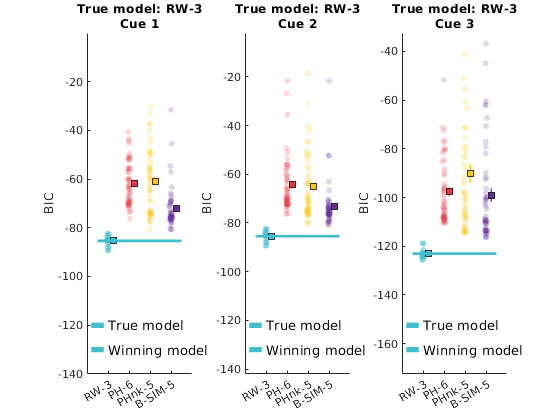

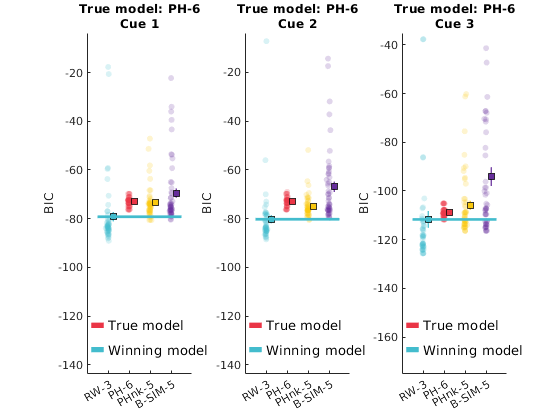

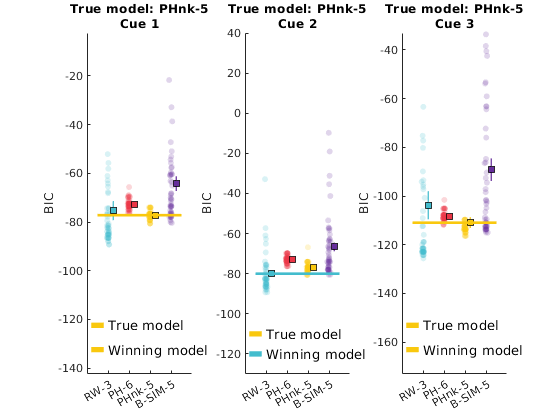

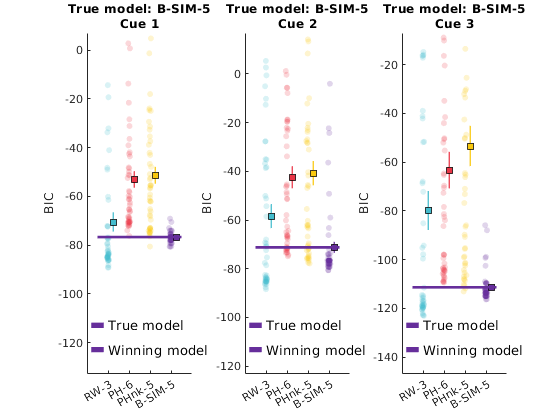

In [3]:
addpath('/data/drive/DPhil/THESIS/Cross_study_analyses/learning-repo/scripts')
clear all
ca=1;
comp = 'onx';
pX_analysis_init; %wipes the entire workspace

subIDs ={};
for i =1:100; subIDs{i} = ['artif_sub_' num2str(i)]; end

%data
model_data = { 'cff_RW3',  'cff_PH_6', 'cff_PH_nokappa_5', 'cff_betastsw_v2g_c'};
model_conf = { 'cff_RW3',  'cff_PH_6', 'cff_PH_nokappa_5', 'cff_betastsw_v2g_c'};

labels_short = {'RW-3',  'PH-6', 'PHnk-5',  'B-SIM-5'};



for mdata = 1:numel(model_data)
    
    eval(model_data{mdata});
    data_folder = [output_folder 'models/artificial_model_data/' spec.models{1}];
    model_fitting_to = spec.models{1};
    disp(['Data set: ' model_fitting_to ]);
    clear('spec');
      labels = {};
      
    for i = 1:numel(model_conf); 
        eval(model_conf{i}); %spec.noruns = 55;
        labels{i}= spec.models{1};
        model_str = [spec.models{1} '_fit_' num2str(spec.noruns) '_'  spec.err.obsFnc  'fto' spec.err.var '_full_' spec.algorithm '_' spec.error_type];
        M{i}=load([data_folder '/'  model_str '.mat']);
      %  for c = 1:3; M{i}.LR_DATA{c}(id, :) =[]; M{i}.LR_DATA{c}= [M{i}.LR_DATA{c} SData]; end
    end

    method = 'BIC';
    AIC ={};
   
    pal = [ 67 188 205; 234 53 70; 249 200 14; 102 46 155;   12 250 120; 248 102 36; 30 30 240; 150 23 234;150  198 23; 0 120 120]./255;
    for c = 1:3
        AIC{c}=table;
       
        for m = 1:numel(model_conf)
            AIC{c}.(['m' num2str(m) '_AIC']) = M{m}.LR_DATA{c}.(method);
            
        end
    end
    blocks = {'60/40', '75/25', '90/10'};
    
    f=figure;
    for c=1:3
            subplot(1,3,c);

            data = AIC{c};
      
            mens =[];
            for m = 1:numel(model_conf)
                me = (data.(['m' num2str(m) '_AIC']));
                %scatter(repmat(m, length(me),1)+randn(length(me),1)*0.03, me, 20, pal(m,:), 'filled', 'MarkerEdgeColor',"none", 'MarkerFaceAlpha', 0.1 );
                hold on;
                %plot_mse_pretty(m+0.25, me, pal(m,:), 'med', 'perc', 'off');
                plot_mse_pretty(m+0.25, me, pal(m,:), 'mean', 'se', 'off');
                mens(m) = nanmean(me);
                  
            
                
            end
            minn = find(mens==min(mens));
            plot([0.5 numel(model_conf)+0.5], [mens(minn) mens(minn)], 'Color', pal(minn,:), 'LineWidth', 2);
            
            if c ==2
                    title({['True model: ' labels_short{mdata}],['Cue ' num2str(c)  ]});
            else
                 title({[''],['Cue ' num2str(c)  ]});
            end
            t=gca;
            t.XTick = 1:numel(model_conf);
    
            t.XTickLabelRotation = 30;
            ylabel(method);
            t.XTickLabel=labels_short;
            
            %if mdata == 3 & c==2
            %    ylim([-130 40]);
            %    text(1, -110, 'True model');
            %    plot([0.2 0.8], repmat(-110, 1,2), 'Color',  pal(mdata,:), 'LineWidth', 4);
            %    text(1, -120, 'Winning model');
            %    plot([0.2 0.8], repmat(-120,1,2), 'Color',  pal(minn,:), 'LineWidth', 4);
            %else
                ylim([mean(mens)-35 mean(mens)+75]);
                text(1, mean(mens)+60, 'True model');
                plot([0.2 0.8], repmat(mean(mens)+60,1,2), 'Color',  pal(mdata,:), 'LineWidth', 4);
                text(1, mean(mens)+50, 'Winning model');
                plot([0.2 0.8], repmat(mean(mens)+50,1,2), 'Color',  pal(minn,:), 'LineWidth', 4);
           %end
            
            

    end
    f.Position(4) = 220;
   
end

## Parameter recovery

In [ ]:
clear all
ca=1;
comp = 'onx';
pX_analysis_init; %wipes the entire workspace

model_conf = {'cff_RW3', 'cff_PH_6','cff_PH_nokappa_5', 'cff_betastsw_v2g_c'};
mstr= {'Rescorla-Wagner', 'Pearce-Hall with kappa', 'Pearce-Hall without kappa', 'Beta State Inference Model'};
%model_conf = {};%'cff_betastsw_v2g_c',};

pr.splits = 4;
pr.only_plausible = 1;
pr.fits = 50;
pr.nocombs = 200;

dx=70;
dy=35;
    gr = [0.1 0.6 0.1];
for m = 1:numel(model_conf)
    f=figure;
    eval(model_conf{m});
    folder = [output_folder 'param_recovery/' spec.models{1}];
    load([folder '/recov_nofits' num2str(pr.fits) '_combs' num2str(pr.nocombs) '.mat'  ], 'params_in', 'params_out');
    labels = [strcat('orig_', spec.labels) strcat('rec_', spec.labels)];
    labels= replace(labels, '_', '__');
    D = [params_in params_out];
    [row, cols] = find(isnan(D)); D = D(setdiff(1:size(D,1), unique(row)),:); 
    [R,P] = corrcoef(D);
    R = R((size(R,1)/2)+1:end,:);
    d = array2table(R, 'VariableNames', labels);
    g = heatmap(round(R,3));
    g.Colormap = parula;
    g.ColorbarVisible = 'off';
    t=gca;
    %t.XDisplayLabels = repmat(spec.labels, 1, 2);
    %t.YDisplayLabels = spec.labels;%repmat({''}, 1, length(spec.labels));
    t.XDisplayLabels = repmat({''}, 1, length(labels));
    t.YDisplayLabels = repmat({''}, 1, length(spec.labels));
    % highlight the two sections
    %rectangle('Position',[1 2 5 6], 'EdgeColor', 'r')
    ax = axes;
    xw = length(labels)+0.5;
    yw=length(strcat('rec__', spec.labels))+0.5;
    xlim([0.5 xw]);
    ylim([0.5 yw]);
    off = 0.01;
    rectangle(ax,'Position',[0.5+off 0.5+off yw-0.5-off yw-0.5-off], 'EdgeColor', 'r', 'LineWidth', 3)
    rectangle(ax,'Position',[yw+off 0.5+off yw-0.5-off yw-0.5-off], 'EdgeColor', gr, 'LineWidth', 3)
    ax.Color = 'none';
    ax.XTick = [];%1:length(labels);
   % ax.XTickLabel = labels;
    ax.YTick = [];
   % ax.YTickLabel = flip(spec.labels); %must flip! stupid matlab!
    
    px =axes; px.Color = 'none'; px.LineWidth=0.1; 
    xlim([0.5 xw]);
    ylim([0.5 yw]);
    px.XTick = 1:length(labels);
    px.XTickLabel = repmat(spec.labels, 1, 2);
    pX.XTickLabelRotation= 30;
    
    px.YTick = 1:length(spec.labels);
    px.YTickLabel = flip(spec.labels);

    if m==1 
        f.Position(3) = length(labels)*dx*1.5;
        f.Position(4) = length(labels)*dy*1.5;

        
    else
        f.Position(3) = length(labels)*dx;
        f.Position(4) = length(labels)*dy;

    
    end
    te=text(xw+0.2, yw-1, 'RECOVERED', 'Color', gr, 'Rotation', 270);
    te=text(1, yw+0.2, 'ORIGINAL', 'Color', 'r');
    te=text(2*length(spec.labels)-1.5, yw+0.2, 'RECOVERED', 'Color', gr);
    
    title(mstr{m});
    
end